<a href="https://colab.research.google.com/github/michaelherediaperez/mecanica_de_solidos_un/blob/main/codigos/cap_02/02_08_01_ejemplo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo sección 2.8.1

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Julio 14, 2022 | Conversión de código de MAXIMA a Python|
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Septiembre 10, 2022 | Mejorando legibilidad|
|Diego Andrés Alvarez, <daalvarez@unal.edu.co>  | Septiembre 13, 2022 | Colocando índices a esfuerzo máximo y mínimo |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Septiembre 19, 2022 | Cambiando comando ```.eig``` por ```.eigh``` |


Considere un punto de un sólido bidimensional en el cual los esfuerzos son $\sigma_x=$ 3 Pa, $\sigma_y=$ 2 Pa y $\tau_{xy}=$ -4 Pa. Se pide:

1. Plantear la matriz de tensiones  $\underline{\underline{\boldsymbol{\sigma}}}$ correspondiente.
2. Calcular el polinomio característico asociado a  $\underline{\underline{\boldsymbol{\sigma}}}$.
3. Calcular la dirección y magnitud de los esfuerzos principales.

In [12]:
import numpy as np  # Librería para cálculo algebráico

# Para imprimir algo bonito (esto no es escencial para el desarrollo, solo para 
# presentar los resultados).
import sympy as sp
from IPython.display import Math                 
def imprimir (texto, variable, unidad=False):
    if unidad:
        return Math(texto + rf'{sp.latex(variable)}' + unidad)
    else:
        return Math(texto + rf'{sp.latex(variable)}')

## 1. Matriz de esfuerzos $\underline{\underline{\boldsymbol{\sigma}}}$

In [13]:
# Se definen los componentes de la matriz sigma.
sx  =  3  # Pa
sy  =  2  # Pa
txy = -4  # Pa  

# Se define la matriz sigma
sigma = np.array([[sx,  txy], 
                  [txy, sy]])

# Visualizamos la matriz de esfuerzos
imprimir(r"\underline{\underline{\boldsymbol{\sigma}}} =", sp.Matrix(sigma))

<IPython.core.display.Math object>

## 2. Polinomio característico

Para obtener los coeficientes del polinomio característico empleamosel comando ```numpy.poly()```.

In [4]:
np.poly(sigma)

array([  1.,  -5., -10.])

Esto es: $$\sigma_n^2 - 5\sigma_n - 10 = 0$$

Y recuerde que un polinomio se puede expresar como un producto punto, así: $$p(\sigma_n)=\left \langle (\sigma_n^2, \sigma_n, 1),(1, -5, -10)  \right \rangle$$


## 3. Dirección y magnitud de los esfuerzos principales

Para calcular los valores y vectores propios de la matriz de esfuerzos $\underline{\underline{\boldsymbol{\sigma}}}$ con ```numpy```, empleamos el comando ```np.linalg.eigh()``` el cual retorna una lista de dos entradas, la primera contiene los valores propios y la segunda contiene los vectores porpios. 

*Nota: refiérase a la documentación para entender porqué se usa el comando [np.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) en lugar de [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)*. 

In [5]:
valp, vecp = np.linalg.eigh(sigma)

Los valores propios representan la magnitud de los esfuerzos principales, estos se almacenaron en el vector `valp`, y gracias al comando `np.linalg.eigh()` estos quedan ordenados de menor a mayor.

Los vectores propios representan las direcciones principales, estos se almacenan en el arreglo `vecp`, y corresponden a sus columnas.

In [16]:

# Extraigo los resultados (cuidado con el orden)
s2_xy, s1_xy = valp
n2g,   n1g   = vecp[:,0], vecp[:,1]     # Las columnas, no las filas.
            #= vecp.T[0], vecp.T[1]       es una forma alterna.                                     

In [17]:
imprimir(r"(\sigma_1)_{xy} =", s1_xy.round(3), " Pa")

<IPython.core.display.Math object>

In [18]:
imprimir(r"(\sigma_2)_{xy} =", s2_xy.round(3), " Pa")

<IPython.core.display.Math object>

In [19]:
imprimir(r"\boldsymbol{\hat{n}}^T_1 =", n1g)

<IPython.core.display.Math object>

In [20]:
imprimir(r"\boldsymbol{\hat{n}}^T_2 =", n2g)

<IPython.core.display.Math object>

In [21]:
# Y si miramos el contenido del arreglo "vecp"
vecp

array([[-0.66180256, -0.74967818],
       [-0.74967818,  0.66180256]])

Así mismo, se puede calcular el ángulo de inclinación de los planos principales sobre los cuales actúan los esfuerzos principales:

In [25]:
# Extraemos los cosenos directores respecto al eje global x, de cada dirección 
# principal.
cos_theta1 = n1g[0]#vecp[:,idx_s1][0]
cos_theta2 = n1g[1]#vecp[:,idx_s2][0]

# Calculamos el ángulo de inclinación del plano principal donde actúa s1 y s2 y 
# se convierte de radianes a grados, redondeando los datos a 1 decimal.
theta1 = np.rad2deg(np.arccos(cos_theta1)).round(1)
theta2 = np.rad2deg(np.arccos(cos_theta2)).round(1)

print(f"theta1 = {theta1}°")
print(f"theta2 = {theta2}°")

theta1 = 138.6°
theta2 = 48.6°


In [29]:
# Comprobamos el theta2 medido desde el eje x en sentido horario:
print(f"theta1 = {(theta1-180).round(1)}°") 

theta1 = -41.4°


Y gráficamente, nuestro sólido queda de la siguiente forma:

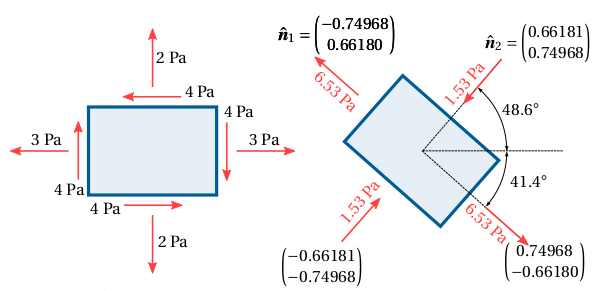

**Nota:** Es importante revisar el sentido de los vectores directores para así calcular correctamente el ángulo de inclinación de los planos.